![alt text](sparks.png "Title")
# Graduate Rotational Internship Program 
# TASK-2

## To explore Supervised Machine Learning

### Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## 1.Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Importing Dataset

In [2]:
df = pd.read_csv("student_scores - student_scores.csv")
df.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [3]:
print('Number of rows and columns is the dataset is:',df.shape)

Number of rows and columns is the dataset is: (25, 2)


### 2.1.Visualizing data

Text(0.5, 1.0, 'Hours Vs Scores')

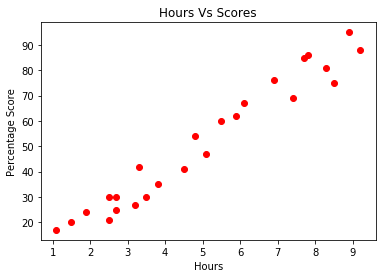

In [4]:
plt.scatter(df['Hours'],df['Scores'],color='red',marker='o')
plt.xlabel("Hours")
plt.ylabel("Percentage Score")
plt.title("Hours Vs Scores")

From the above graph, it can be seen that the Hours and Percenatge Scores are positively correlated.

In [5]:
print('The correlation between Hours and Scores is:',df['Scores'].corr(df['Hours']))

The correlation between Hours and Scores is: 0.9761906560220887


## 3.Model training, testing and predicting

### 3.1.Splitting the dataset as Feature and Label Variable  

In [49]:
X = df.iloc[:,0:1].values
y = df.iloc[:,1:].values

### 3.2.Importing the Model

Importing the Linear regression model for the Scikit learn package.

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#### Using Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score
CV = cross_val_score(lr, X, y, cv=5)
print('The cross validation score for each folds is:',CV)

The cross validation score for each folds is: [0.78626426 0.97891923 0.93182467 0.96604831 0.9273292 ]


In [9]:
print("The mean score (accuracy) of the folds are:",CV.mean())

The mean score (accuracy) of the folds are: 0.9180771341891051


#### Using Train Test Split

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0) 

In [11]:
lr.fit(X_train,y_train)
print("Training is completed")

Training is completed


#### Regression Plot

[Text(0.5, 1.0, 'Hours Vs Scores')]

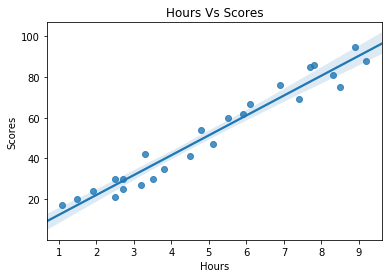

In [12]:
ax = sns.regplot(df['Hours'],df['Scores'])
ax.set(title='Hours Vs Scores')

### 3.4.Predicting the values

In [43]:
y_pred = lr.predict(X_test)
print('The accuracy of the model is:',lr.score(X_test,y_test)*100,'%')
print("The equation of model is:  Score=",lr.coef_[0],'+',lr.intercept_,'*Hours')

The accuracy of the model is: 95.68211104435257 %
The equation of model is:  Score= [9.78856669] + [2.37081538] *Hours


In [14]:
y_ans = lr.predict([[9.25]])
print("The predicted score of a student who studies for 9.25 hours is",y_ans[0])

The predicted score of a student who studies for 9.25 hours is [92.91505723]


## 4.Model Evaluation

In [22]:
from sklearn import metrics
print('The MSE is',metrics.mean_squared_error(y_test,y_pred))
print('The MAE is',metrics.mean_absolute_error(y_test,y_pred))

The MSE is 22.96509721270043
The MAE is 4.419727808027652


## Using Random Forest Regressor

Repeating the above steps:

In [39]:
from sklearn.ensemble import RandomForestRegressor 

#### Importing the Model

In [40]:
rf = RandomForestRegressor(n_estimators=6,criterion='mse',random_state=0)
rf.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=6, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [50]:
y_pred = rf.predict(X_test)
print('The accuracy of the Random Forest Regressor model is:',rf.score(X_test,y_test)*100,'%')

The accuracy of the Random Forest Regressor model is: 91.75586174029137 %
